In [7]:
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import numpy as np

proj = ccrs.Robinson()
cmap = plt.get_cmap('nipy_spectral',66)

In [18]:
ds = xr.open_dataset('../data/ecefiles/runoff_maps.nc')

In [19]:
ds

<xarray.Dataset>
Dimensions:            (lat: 256, lon: 512)
Coordinates:
  * lon                (lon) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
  * lat                (lat) float64 -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
Data variables:
    drainage_basin_id  (lat, lon) int32 ...
    arrival_point_id   (lat, lon) int32 ...
    calving_point_id   (lat, lon) int32 ...
Attributes:
    ece-origin:  Klaus Wyser (SMHI) for EC-Earth

In [4]:
def plotvar(varname):
    fig = plt.figure(figsize=(11,8))
    ax = fig.add_subplot(111,projection=proj)
    var = ds[varname]
    im = ax.pcolormesh(ds.lon,ds.lat,np.where(var<0,np.nan,var),shading='auto',cmap=cmap,transform=ccrs.PlateCarree())
    ax.coastlines(lw=.1)
    ax.set_title(varname)
    plt.colorbar(im,orientation='horizontal')
    plt.savefig(f'../figures/{varname}.png',dpi=450)
    plt.show()

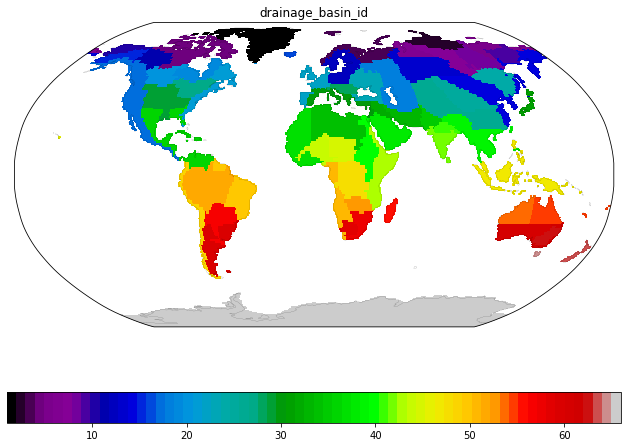

In [5]:
plotvar('drainage_basin_id')

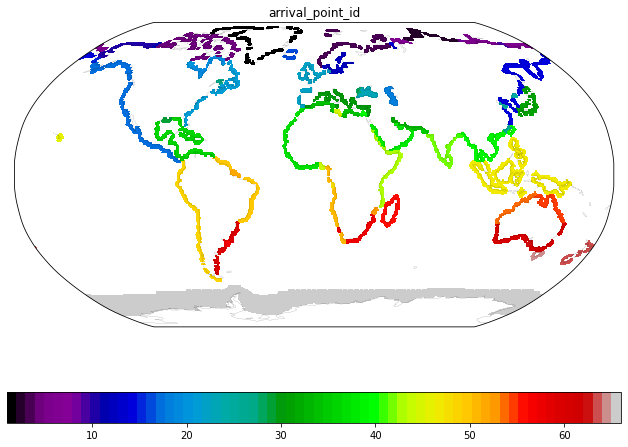

In [6]:
plotvar('arrival_point_id')

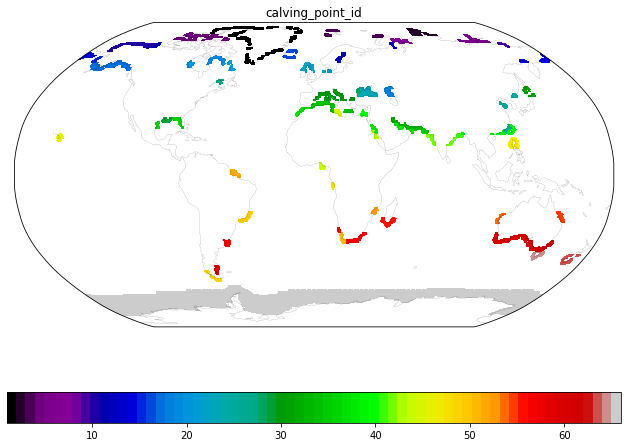

In [7]:
plotvar('calving_point_id')

In [8]:
ds = xr.open_dataset('../data/ecefiles/ECE3_1m_19900101_19901231_grid_T.nc')

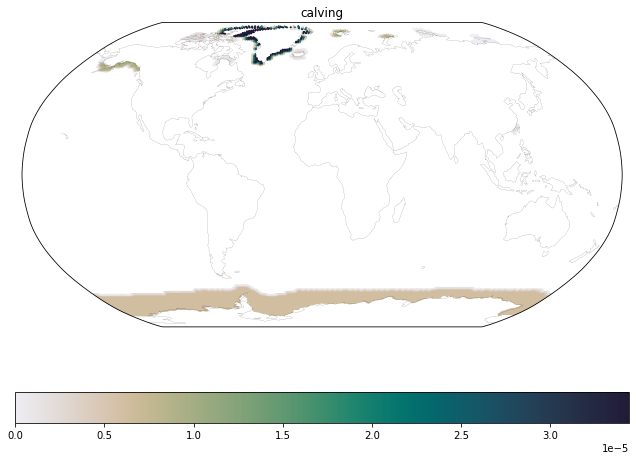

In [9]:
proj = ccrs.Robinson()

varname = 'calving'
cmap = 'cmo.rain'
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111,projection=proj)
var = ds[varname]
var = var[3,:,:].values
var = np.where(var<1e-8,np.nan,var)
#im = ax.pcolormesh(ds.nav_lon,ds.nav_lat,var,shading='nearest',cmap=cmap)
im = ax.scatter(ds.nav_lon,ds.nav_lat,s=1,c=var,cmap=cmap,transform=ccrs.PlateCarree(),vmin=0)
ax.coastlines(lw=.1)
ax.set_title(varname)
ax.set_global()
plt.colorbar(im,orientation='horizontal')
plt.savefig(f'../figures/eceoutput_{varname}.png',dpi=450)
plt.show() 

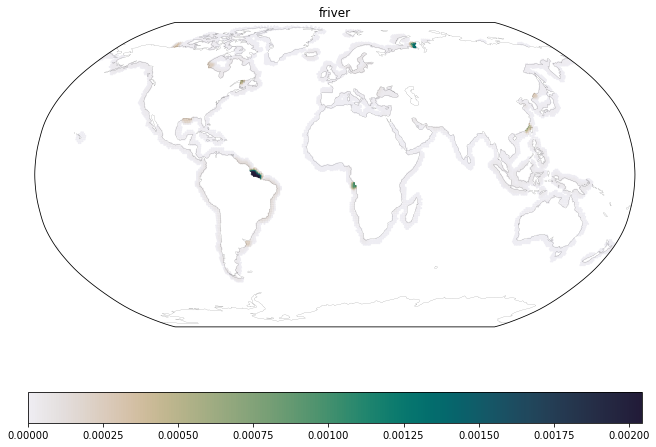

In [18]:
proj = ccrs.Robinson()

varname = 'friver'
cmap = 'cmo.rain'
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111,projection=proj)
var = ds[varname]
var = var[3,:,:].values
var = np.where(var<1e-8,np.nan,var)
#im = ax.pcolormesh(ds.nav_lon,ds.nav_lat,var,shading='nearest',cmap=cmap)
im = ax.scatter(ds.nav_lon,ds.nav_lat,s=1,c=var,cmap=cmap,transform=ccrs.PlateCarree(),vmin=0)
ax.coastlines(lw=.1)
ax.set_title(varname)
ax.set_global()
plt.colorbar(im,orientation='horizontal')
plt.savefig(f'../figures/eceoutput_{varname}.png',dpi=450)
plt.show() 

In [20]:
ds = xr.open_dataset('../data/ecefiles/runoff_depth.nc')

In [21]:
ds

<xarray.Dataset>
Dimensions:       (t: 1, x: 362, y: 292, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    rodepth       (t, y, x) float64 ...
Attributes:
    file_name:    runoff_depth.nc
    TimeStamp:    18/11/2016 10:21:48 +0100
    ece-comment:  Created (ln_rnf_depth_ini=T) from SHACONEMO INPUTS_ORCA1_LI...
    ece-origin:   UFla (SMHI) for EC-Earth

In [6]:
def plotvar(varname):
    fig = plt.figure(figsize=(11,8))
    ax = fig.add_subplot(111,projection=proj)
    var = ds[varname][0,:,:]
    #im = ax.pcolormesh(ds.nav_lon,ds.nav_lat,np.where(var<0,np.nan,var),shading='auto',cmap=cmap,transform=ccrs.PlateCarree())
    im = ax.scatter(ds.nav_lon,ds.nav_lat,s=1,c=var,cmap=cmap,transform=ccrs.PlateCarree(),vmin=0,vmax=10)
    ax.coastlines(lw=.1)
    ax.set_title(varname)
    plt.colorbar(im,orientation='horizontal')
    plt.savefig(f'../figures/{varname}.png',dpi=450)
    plt.show()

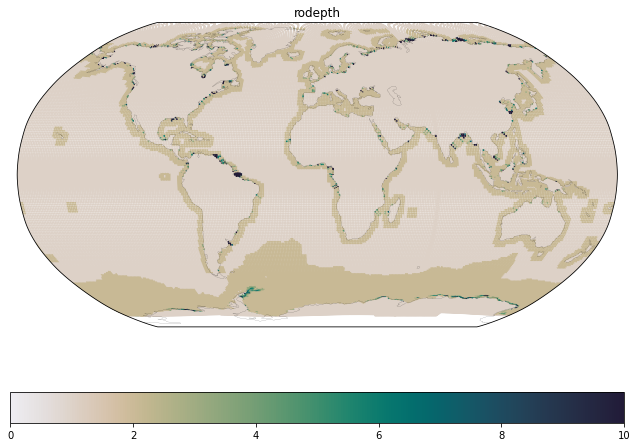

In [32]:
plotvar('rodepth')

In [33]:
ds = xr.open_dataset('../data/ecefiles/ECE3_1m_19900101_19901231_SBC.nc')

In [34]:
ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 12, x: 362, y: 292)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1990-01-16T12:00:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    qsr_oce               (time_counter, y, x) float32 ...
    qns_oce               (time_counter, y, x) float32 ...
    qsr_ice               (time_counter, y, x) float32 ...
    qns_ice               (time_counter, y, x) float32 ...
    qtr_ice               (time_counter, y, x) float32 ...
    taum                  (time_counter, y, x) float32 ...
    windsp                (time_counter, y, x) float32 ...
    precip                (time_counter, y, x) float32 ...
    qt_oce                (time_counter, y, x) float32 ...
    qemp_oce              (time_counter, y, x) float32 ...
    qt_ice                (time_counter, y, x) float32 ...
    qemp_ice              (time_counter, y, x) float32 ...
    hflx_rain_cea         (time_counter, y, x) float32 ...
    hflx_evap_cea         (time_counter, y, x) float32 ...
    hflx_snow_cea         (time_counter, y, x) float32 ...
    hflx_cal_cea          (time_counter, y, x) float32 ...
    wfo                   (time_counter, y, x) float32 ...
    emp_oce               (time_counter, y, x) float32 ...
    emp_ice               (time_counter, y, x) float32 ...
    friver                (time_counter, y, x) float32 ...
    calving               (time_counter, y, x) float32 ...
    iceberg               (time_counter, y, x) float32 ...
    iceshelf              (time_counter, y, x) float32 ...
    vfxice                (time_counter, y, x) float32 ...
    vfxsnw                (time_counter, y, x) float32 ...
    vfxsub                (time_counter, y, x) float32 ...
    vfxspr                (time_counter, y, x) float32 ...
    rain                  (time_counter, y, x) float32 ...
    snow_ao_cea           (time_counter, y, x) float32 ...
    snow_ai_cea           (time_counter, y, x) float32 ...
    evap_ao_cea           (time_counter, y, x) float32 ...
    subl_ai_cea           (time_counter, y, x) float32 ...
    fmmflx                (time_counter, y, x) float32 ...
    fwfisf                (time_counter, y, x) float32 ...
    hflx_snow_ai          (time_counter, y, x) float32 ...
    hflx_snow_ao          (time_counter, y, x) float32 ...
    hflx_ice              (time_counter, y, x) float32 ...
    hflx_rnf              (time_counter, y, x) float32 ...
    sosflxdo              (time_counter, y, x) float32 ...
    snowpre               (time_counter, y, x) float32 ...
    utau_ice              (time_counter, y, x) float32 ...
    vtau_ice              (time_counter, y, x) float32 ...
    wfcorr                (time_counter, y, x) float32 ...
    hfcorr                (time_counter, y, x) float32 ...
Attributes:
    name:         ECE3_1m_19900101_19901231_SBC
    description:  surface fluxes variables
    title:        surface fluxes variables
    Conventions:  CF-1.6
    timeStamp:    2021-Jan-08 11:53:51 GMT
    uuid:         107594f8-42d6-449d-a881-b58d5a15e6a6

In [23]:
ds = xr.open_dataset('../data/ecefiles/runoff-icb_DaiTrenberth_Depoorter_ORCA1_JD.nc')

In [24]:
ds

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 362, y: 292)
Coordinates:
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * time_counter  (time_counter) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: x, y
Data variables:
    Icb_flux      (time_counter, y, x) float32 ...
    socoefr       (y, x) float32 ...
    sodepmax_isf  (time_counter, y, x) float32 ...
    sodepmin_isf  (time_counter, y, x) float32 ...
    sornfisf      (time_counter, y, x) float32 ...
    sorunoff      (time_counter, y, x) float32 ...
Attributes:
    title:         global runoff projected on eORCA1 grid
    description1:  north of 60 south : Dai_Trenberth Continental Freshwater D...
    description2:  south of 60 south : Depoorter Freshwater Discharge from ba...
    description3:  Merino I. Freshwater flux from Iceberg melting in Southern...
    history1:      north of 60 south : use runoff_1m_DaiTrenberthSummer_1951_...
    history2:      south of 60 south : use Depoorter estimates (contact Ignac...
    reference1:    Dai, A., and K. E. Trenberth, 2002: Estimates of freshwate...
    reference2:    Dai, A., T. Qian, K. E. Trenberth, and J. D Milliman, 2009...
    reference3:    M. A. Depoorter, J. L. Bamber, J. A. Griggs, J. T. M. Lena...
    creation:      Mon Dec 14 16:31:35 2015
    history3:      socoefr north of 60 south from eORCA1_R1_runoff_clim_v1.0_...
    history4:      sorunoff from eORCA1_R1_runoff_clim_v1.0_nomask.nc (north ...
    ece-comment:   From SHACONEMO INPUTS_ORCA1_LIM3_PISCES_V9/runoff-icb_DaiT...
    ece-origin:    UFla (SMHI) for EC-Earth

In [30]:
cmap = 'cmo.rain'
def plotvar(varname):
    fig = plt.figure(figsize=(11,8))
    ax = fig.add_subplot(111,projection=proj)
    var = ds[varname][0,:,:]
    #im = ax.pcolormesh(ds.nav_lon,ds.nav_lat,np.where(var<0,np.nan,var),shading='auto',cmap=cmap,transform=ccrs.PlateCarree())
    im = ax.scatter(ds.nav_lon,ds.nav_lat,s=1,c=var,cmap=cmap,transform=ccrs.PlateCarree(),vmax=.0001)
    ax.coastlines(lw=.1)
    ax.set_title(varname)
    plt.colorbar(im,orientation='horizontal')
    plt.savefig(f'../figures/{varname}.png',dpi=450)
    plt.show()

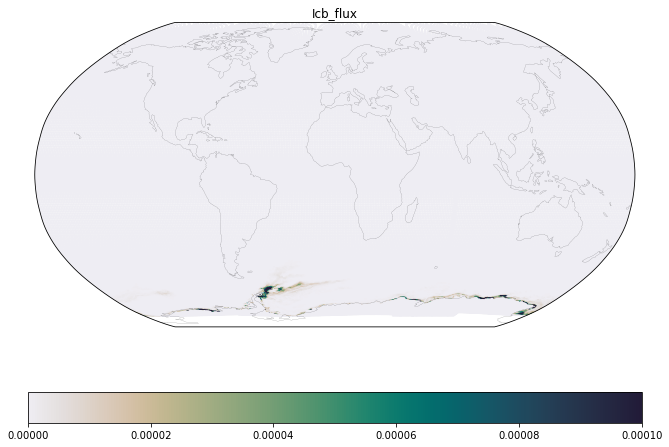

In [31]:
plotvar('Icb_flux')

In [36]:
ds = xr.open_dataset('../data/ecefiles/ECE3_1m_19900101_19901231_grid_T.nc')
ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, olevel: 75, time_counter: 12, x: 362, y: 292)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * olevel                (olevel) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1990-01-16T12:00:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    olevel_bounds         (olevel, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    e3t                   (time_counter, olevel, y, x) float32 ...
    pbo                   (time_counter, y, x) float32 ...
    zos                   (time_counter, y, x) float32 ...
    zossq                 (time_counter, y, x) float32 ...
    thetao                (time_counter, olevel, y, x) float32 ...
    tos                   (time_counter, y, x) float32 ...
    tossq                 (time_counter, y, x) float32 ...
    so                    (time_counter, olevel, y, x) float32 ...
    sos                   (time_counter, y, x) float32 ...
    sstdcymax             (time_counter, y, x) float32 ...
    sstdcymin             (time_counter, y, x) float32 ...
    sstdcy                (time_counter, y, x) float32 ...
    sssdcymax             (time_counter, y, x) float32 ...
    sssdcymin             (time_counter, y, x) float32 ...
    sssdcy                (time_counter, y, x) float32 ...
    mld10_1dcymax         (time_counter, y, x) float32 ...
    mld10_1dcymin         (time_counter, y, x) float32 ...
    mld10_1dcy            (time_counter, y, x) float32 ...
    rhopoto               (time_counter, olevel, y, x) float32 ...
    omlmax                (time_counter, y, x) float32 ...
    mldkz5                (time_counter, y, x) float32 ...
    mldr10_1              (time_counter, y, x) float32 ...
    mldr10_1max           (time_counter, y, x) float32 ...
    wfcorr                (time_counter, y, x) float32 ...
    nshfls                (time_counter, y, x) float32 ...
    rsntds                (time_counter, y, x) float32 ...
    rsds                  (time_counter, olevel, y, x) float32 ...
    hfcorr                (time_counter, y, x) float32 ...
    mlddzt                (time_counter, y, x) float32 ...
    mldr10_3              (time_counter, y, x) float32 ...
    mldr0_1               (time_counter, y, x) float32 ...
    mldr0_3               (time_counter, y, x) float32 ...
    mld_dt02              (time_counter, y, x) float32 ...
    topthdep              (time_counter, y, x) float32 ...
    pycndep               (time_counter, y, x) float32 ...
    BLT                   (time_counter, y, x) float32 ...
    tinv                  (time_counter, y, x) float32 ...
    depti                 (time_counter, y, x) float32 ...
    hc300                 (time_counter, y, x) float32 ...
    hdivtr                (time_counter, olevel, y, x) float32 ...
    windsp                (time_counter, y, x) float32 ...
    wfob                  (time_counter, y, x) float32 ...
    fmmflx                (time_counter, y, x) float32 ...
    siconc                (time_counter, y, x) float32 ...
    qt_oce                (time_counter, y, x) float32 ...
    qemp_oce              (time_counter, y, x) float32 ...
    qt_ice                (time_counter, y, x) float32 ...
    qemp_ice              (time_counter, y, x) float32 ...
    hflx_rain_cea         (time_counter, y, x) float32 ...
    hflx_evap_cea         (time_counter, y, x) float32 ...
    hflx_snow_cea         (time_counter, y, x) float32 ...
    hflx_cal_cea          (time_counter, y, x) float32 ...
    wfo                   (time_counter, y, x) float32 ...
    emp_oce               (time_counter, y, x) float32 ...
    emp_ice               (time_counter, y, x) float32 ...


In [29]:
cmap = 'cmo.rain'
def plotvar(varname):
    fig = plt.figure(figsize=(11,8))
    ax = fig.add_subplot(111,projection=proj)
    var = ds[varname][0,:,:]
    #im = ax.pcolormesh(ds.nav_lon,ds.nav_lat,np.where(var<0,np.nan,var),shading='auto',cmap=cmap,transform=ccrs.PlateCarree())
    im = ax.scatter(ds.nav_lon,ds.nav_lat,s=1,c=var,cmap=cmap,transform=ccrs.PlateCarree(),vmax=.00001)
    ax.coastlines(lw=.1)
    ax.set_title(varname)
    plt.colorbar(im,orientation='horizontal')
    plt.savefig(f'../figures/{varname}.png',dpi=450)
    plt.show()

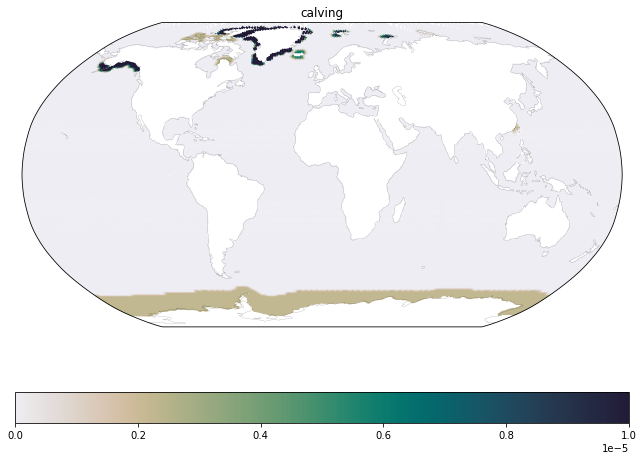

In [38]:
plotvar('calving')